# Here we are going to analyse the Covid-19 dataset from World Health Organisation (WHO) step by step.


# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import urllib
from datetime import datetime
%matplotlib notebook
from matplotlib import pyplot as plt
import seaborn as sns


# Retrieving and Loading dateset

In [2]:
#dataset url
url='https://covid19.who.int/WHO-COVID-19-global-data.csv'

#creating dateset directory path
file_path=os.path.join('data','covid')

In [3]:
#joining the path
os.makedirs(file_path,exist_ok=True)
csv_path=os.path.join(file_path,'WHO-COVID-19-GLOBAL-DATA.csv')

#retrieving url
urllib.request.urlretrieve(url,csv_path)

('data\\covid\\WHO-COVID-19-GLOBAL-DATA.csv',
 <http.client.HTTPMessage at 0x1c324ebb8b0>)

In [4]:
#dataset path
csv_path

'data\\covid\\WHO-COVID-19-GLOBAL-DATA.csv'

In [5]:
# reading the dataset
df=pd.read_csv(csv_path)

# Analyzing and Transforming data

In [6]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [7]:
#checking the datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117552 entries, 0 to 117551
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      117552 non-null  object
 1   Country_code       117056 non-null  object
 2   Country            117552 non-null  object
 3   WHO_region         117552 non-null  object
 4   New_cases          117552 non-null  int64 
 5   Cumulative_cases   117552 non-null  int64 
 6   New_deaths         117552 non-null  int64 
 7   Cumulative_deaths  117552 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 7.2+ MB


In [8]:
# filtering for specific country
df1=df[df['Country']=='India']
df1

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
47616,2020-01-03,IN,India,SEARO,0,0,0,0
47617,2020-01-04,IN,India,SEARO,0,0,0,0
47618,2020-01-05,IN,India,SEARO,0,0,0,0
47619,2020-01-06,IN,India,SEARO,0,0,0,0
47620,2020-01-07,IN,India,SEARO,0,0,0,0
...,...,...,...,...,...,...,...,...
48107,2021-05-08,IN,India,SEARO,401078,21892676,4187,238270
48108,2021-05-09,IN,India,SEARO,403738,22296414,4092,242362
48109,2021-05-10,IN,India,SEARO,366161,22662575,3754,246116
48110,2021-05-11,IN,India,SEARO,329942,22992517,3876,249992


In [9]:
# converting string to datetime
df1['Date_reported']=pd.to_datetime(df1['Date_reported'])

<ipython-input-9-c4bc0d2c588e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date_reported']=pd.to_datetime(df1['Date_reported'])


In [10]:
df1['Date_reported']

47616   2020-01-03
47617   2020-01-04
47618   2020-01-05
47619   2020-01-06
47620   2020-01-07
           ...    
48107   2021-05-08
48108   2021-05-09
48109   2021-05-10
48110   2021-05-11
48111   2021-05-12
Name: Date_reported, Length: 496, dtype: datetime64[ns]

In [11]:
# setting Date_reported as index
df1.set_index('Date_reported',inplace=True)
df1.head()

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-03,IN,India,SEARO,0,0,0,0
2020-01-04,IN,India,SEARO,0,0,0,0
2020-01-05,IN,India,SEARO,0,0,0,0
2020-01-06,IN,India,SEARO,0,0,0,0
2020-01-07,IN,India,SEARO,0,0,0,0


# Data Visualization (Matplotlib & Seaborn)

In [12]:
#collecting data for plotting in lists

deaths=df1['New_deaths'].tolist()  
cases=df1['New_cases'].tolist()
date=df1.index.tolist()

<IPython.core.display.Javascript object>


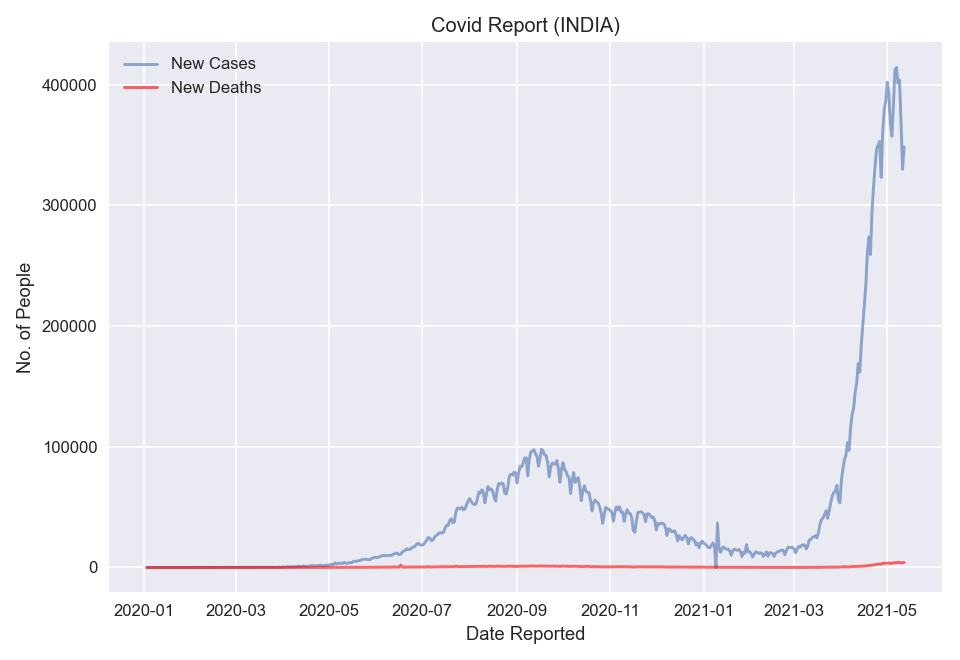

In [14]:
plt.style.use('seaborn')

# plotting the data
plt.plot(date,cases,alpha=.6,label='New Cases')
plt.plot(date,deaths,alpha=.6,color='r',label='New Deaths')

# setting  x, y labels and title
plt.ylabel('No. of People')
plt.xlabel('Date Reported')
plt.title('Covid Report (INDIA)')

# automatically adjust subplot parameters
plt.tight_layout()

# saving the plot
plt.savefig('Covid_Report(INDIA).png')

# for describing the elements of the graph
plt.legend(loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


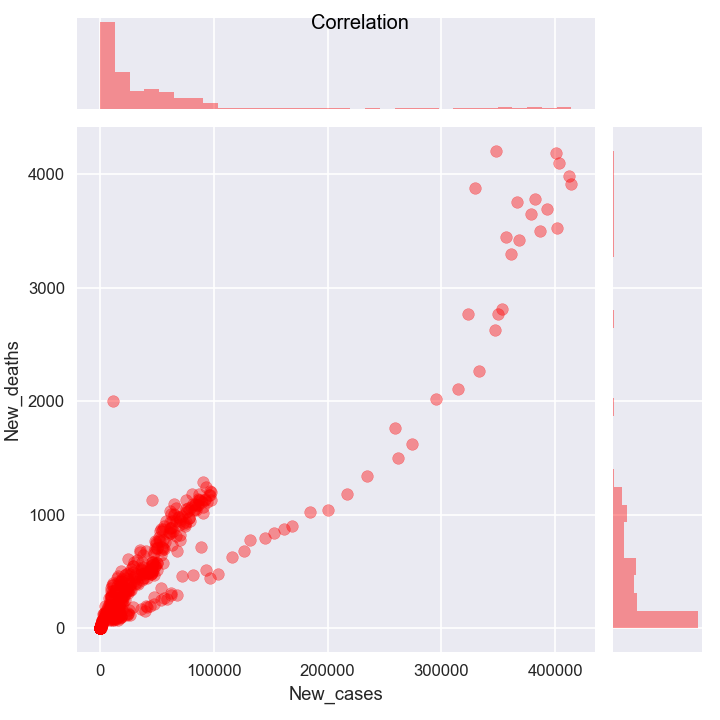

In [19]:
# correlation between new_deaths and new_cases
sns.jointplot(x='New_cases',y='New_deaths', data=df1,color='r',alpha=.4)
plt.suptitle("Correlation",color='k')

# saving the plot
plt.savefig('Correlation.png')

In [16]:
# Visualizing the situation of top5 countries in new cases of the recent day

# filtering by recent date
new_df=df[df['Date_reported']=='2021-05-10']

# sorting by no of new cases
new_df.sort_values('New_cases',ascending=False,inplace=True)

# seperating the top5
top_5=new_df.head()
top_5

<ipython-input-16-0e41a63fad75>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.sort_values('New_cases',ascending=False,inplace=True)


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
48109,2021-05-10,IN,India,SEARO,366161,22662575,3754,246116
14381,2021-05-10,BR,Brazil,AMRO,63430,15145879,2202,421316
112589,2021-05-10,US,United States of America,AMRO,35310,32372422,646,576123
4461,2021-05-10,AR,Argentina,AMRO,18024,3136158,170,67042
21821,2021-05-10,CO,Colombia,AMRO,16910,2985536,492,77359


In [17]:
# parameters for ploting
countries=top_5['Country'].tolist()
new_cases=top_5['New_cases'].tolist()
new_deaths=top_5['New_deaths'].tolist()

<IPython.core.display.Javascript object>


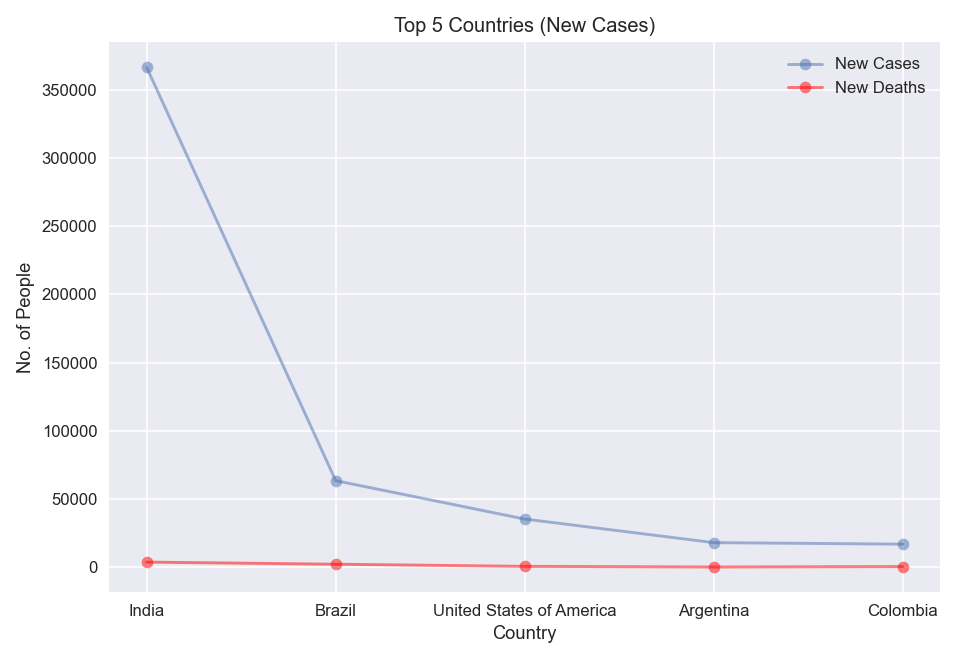

In [20]:
# plotting the data
plt.plot(countries,new_cases,marker='o',alpha=.5,label='New Cases')
plt.plot(countries,new_deaths,color='r',marker='o',alpha=.5,label='New Deaths')

# setting the labels
plt.title('Top 5 Countries (New Cases)')
plt.xlabel('Country')
plt.ylabel('No. of People')

# saving the plot
plt.savefig('Top5_Countries.png')

# adjusting and showing
plt.tight_layout()
plt.legend()
plt.show()